In [1]:
import yaml
import os

class Vars:
    _data = {}
    _path = None

    @classmethod
    def initialize(cls, path):
        cls._path = path
        cls._data = cls.load()

    @classmethod
    def load(cls):
        if cls._path and os.path.exists(cls._path):
            with open(cls._path, 'r') as f:
                return yaml.safe_load(f)
        return {}

    @classmethod
    def get(cls, key):
        if key not in cls._data:
            raise KeyError(f"Variable {key} not found")
        return cls._data[key]

    @classmethod
    def set(cls, key, value):
        cls._data[key] = value
        with open(cls._path, 'w') as f:
            yaml.safe_dump(cls._data, f, default_flow_style=False)

In [2]:
Vars.initialize('vars.yaml')

In [3]:
Vars.set("ENV", "prod")
Vars.set("MATRICE_ACCESS_KEY_ID", "enter")
Vars.set("MATRICE_SECRET_ACCESS_KEY", "enter")
Vars.set("MATRICE_ACCOUNT_NUMBER", "9782886768719887307619115")

In [4]:
import os
os.environ['ENV'] = Vars.get('ENV')
access_key = Vars.get('MATRICE_ACCESS_KEY_ID')
secret_key = Vars.get('MATRICE_SECRET_ACCESS_KEY')
account_number = Vars.get('MATRICE_ACCOUNT_NUMBER')

In [5]:
from matrice.session import Session
from matrice.projects import Projects
from matrice.dataset import Dataset
from matrice.models import Model
from matrice.deployment import Deployment
from matrice.exported_model import ExportedModel
import sys
import os

In [6]:
session_instance = Session(account_number=account_number, access_key=access_key, secret_key=secret_key)
print("A Session has been initialized:", session_instance)

A Session has been initialized: <matrice.session.Session object at 0x000002A0BA2B3D00>


In [7]:
projects_list, msg = session_instance.list_projects(project_type="detection")

# Check if there is a message or error
if msg:
    print(f"Message: {msg}")

# Print the projects in a formatted manner
for project_name, project_instance in projects_list.items():
    print(f"Project Name: {project_name} | Project ID: {project_instance.project_id}") #To fix: ERROR: May return none and give error if proj is empty list

Message: Projects fetched successfully
Project Name: Detection_of_Cardiomegaly | Project ID: 6830406a0a1d0e31e05ff8c0
Project Name: pothole_segmentation | Project ID: 682c34770a1d0e31e05fe361
Project Name: malaria_parasite_detection | Project ID: 682f151b0a1d0e31e05ff3ca
Project Name: breast_cancer | Project ID: 682f08710a1d0e31e05ff347
Project Name: eye_disease_detection | Project ID: 682ec5760a1d0e31e05ff14a
Project Name: parking_det_1 | Project ID: 682ecbf80a1d0e31e05ff174
Project Name: flower_segmentation | Project ID: 682dde1b0a1d0e31e05fedca
Project Name: intrusion_fencing | Project ID: 682da07c0a1d0e31e05feb85
Project Name: leaf_disease_Det | Project ID: 682db81c0a1d0e31e05fecd6
Project Name: wound_seg | Project ID: 682daae50a1d0e31e05fec28


In [8]:
project_name = "faishon_det"
for name, project_instance in projects_list.items():
    if name == project_name:
        projects_instance = Projects(session_instance, project_name=project_name)
        session_instance.update(projects_instance.project_id)
        print(f"Project '{project_name}' already exists. Initialized Projects instance.")
        project_exists = True
        break
    else:
        project_exists = False

if project_exists == False:
    print(f"Creating a new project: {project_name}")

Creating a new project: faishon_det


In [9]:
import pprint

name = project_name

# Function to create a project
def create_project():
    project_name = name
    input_type = "image"
    output_type = "detection"

    enabled_platforms = {
        "matrice": True,
        "android": False,
        "ios": False,
        "tpu": False,
        "intelCPU": False,
        "gcloudGPU": False
    }

    resp, error = session_instance._create_project(project_name, input_type, output_type)
    if error:
        print(f"Error: {error}")
        return None, None
    else:
        print(f"Project created with ID: {resp['_id']}")
        return resp['_id'], resp['name']

# Check if project_id and project_name exist
project_id = None
project_name = None

if not project_exists:
    project_id, project_name = create_project()
else:
    project_id = projects_instance.project_id
    project_name = projects_instance.project_name
    print(f"Project already exists with ID: {project_id} and Name: {project_name}")


print("----------------------------")
print(f"Project ID: {project_id}")
print(f"Project Name: {project_name}")
print("----------------------------")


Project created with ID: 68304a2c0a1d0e31e05ff8f2
----------------------------
Project ID: 68304a2c0a1d0e31e05ff8f2
Project Name: faishon_det
----------------------------


In [10]:
Vars.set("project_name",project_name)
Vars.set("project_id", project_id)

In [11]:
session_instance.update(project_id)
project_instance = Projects(session_instance, project_name=project_name)
print("A Project class has been initialized",project_instance)

A Project class has been initialized <matrice.projects.Projects object at 0x000002A0BA2B23B0>


In [12]:
dataset=Dataset(session_instance, dataset_id='68304d2b77c1220180510b45')

In [13]:
dataset_id = dataset.dataset_id
# action_id = dataset_action.action_id

print(f"Dataset ID: {dataset_id}")
# print(f"Action ID: {action_id}")

Dataset ID: 68304d2b77c1220180510b45


In [14]:
Vars.set("dataset_id", dataset.dataset_id)
# Vars.set("dataset_action_id", dataset_action.action_id)

In [15]:
def print_dataset_info(dataset):
   
    dataset_id = dataset.dataset_details['_id']
    dataset_name = dataset.dataset_details['name']
    version_status = dataset.dataset_details.get("stats", [{}])[0].get("versionStatus")
    latest_version = dataset.dataset_details['latestVersion']
    no_of_samples = sum(version['versionStats']['total'] for version in dataset.dataset_details.get('stats', []))
    no_of_classes = len(dataset.dataset_details.get('stats', [{}])[0].get('classStat', {}))
    no_of_versions = len(dataset.dataset_details.get('allVersions', []))
    last_updated_at = dataset.dataset_details.get('updatedAt')

    print(f"Dataset ID: {dataset_id}")
    print(f"Dataset Name: {dataset_name}")
    print(f"Version Status: {version_status}")
    print(f"Latest Version: {latest_version}")
    print(f"Number of Samples: {no_of_samples}")
    print(f"Number of Classes: {no_of_classes}")
    print(f"Number of Versions: {no_of_versions}")
    print(f"Last Updated At: {last_updated_at}")

# dataset.refresh()   
print_dataset_info(dataset)

Dataset ID: 68304d2b77c1220180510b45
Dataset Name: Untitled Dataset 2025-05-23 15:52:51
Version Status: processed
Latest Version: v1.0
Number of Samples: 1801
Number of Classes: 8
Number of Versions: 1
Last Updated At: 2025-05-23T10:28:26.612Z


In [16]:
from matrice.model_store import get_all_model_families 

resp , error , mesage = get_all_model_families( session_instance , project_id , project_type="detection" )
print("----List of available Detection models on platform----")
# Iterate through each model family in the response
for model_family in resp:
    # Extract _id and modelFamily (model family name)
    model_family_id = model_family.get('_id')
    name = model_family.get('modelFamily')
    
    # Print in formatted manner
    print(f"ID: {model_family_id}, Model Family Name: {name}")

----List of available Detection models on platform----
ID: 675fea73ab963894d8458c2f, Model Family Name: YOLOv8
ID: 6760387eab963894d8458df1, Model Family Name: YOLOv10
ID: 6762604ed6db1ef9132e84e8, Model Family Name: D-FINE
ID: 676adcc77c6d00452fe89859, Model Family Name: RT-DETR
ID: 67c8441e50c1cabe4d0991c3, Model Family Name: YOLOv9


In [17]:
from matrice.model_store import ModelFamily

model_family_id = "67c8441e50c1cabe4d0991c3"
# Initialize the ModelFamily instance after choosing a Model Family
model_family_instance = ModelFamily(session_instance, model_family_id=model_family_id) # Update with the model family ID of your choice
print("A ModelFamily instance has been initialized",model_family_instance)

A ModelFamily instance has been initialized <matrice.model_store.ModelFamily object at 0x000002A0BB89E4D0>


In [18]:
# Fetch model architectures
import pprint
arch_resp, error, message = model_family_instance.get_model_archs()
if error:
    print(f"Error: {error}")
else:
    pprint.pprint(arch_resp)
    # Check if resp is a list or a dictionary
    if isinstance(arch_resp, list):
        # Iterate through each model info in the list
        for model_info in arch_resp:
            model_key = model_info["model_key"]
            model_arch_instance = model_info["model_arch_instance"]
            
            # Extract model information
            model_info_id = model_arch_instance.model_arch_id
            name = model_arch_instance.model_name
            key = model_arch_instance.model_key
            params = model_arch_instance.params_millions

            # Print in formatted manner
            print(f"ID: {model_info_id} |  Model Name: {name} | Model Key: {key} | Params in Millions: {params}")
            
    elif isinstance(arch_resp, dict):
        # Iterate through each model key in the dictionary
        for model_key, model_arch_instance in arch_resp.items():
            # Extract model information
            model_info_id = model_arch_instance.model_arch_id
            name = model_arch_instance.model_name
            key = model_arch_instance.model_key
            params = model_arch_instance.params_millions

            # Print in formatted manner
            print(f"ID: {model_info_id} | Model Name: {name} | Model Key: {key} | Params in Millions: {params}")

{'yolov9c': <matrice.model_store.ModelArch object at 0x000002A0BB938EB0>,
 'yolov9e': <matrice.model_store.ModelArch object at 0x000002A0BB9385E0>,
 'yolov9m': <matrice.model_store.ModelArch object at 0x000002A0BB93B6A0>,
 'yolov9s': <matrice.model_store.ModelArch object at 0x000002A0BB93B850>,
 'yolov9t': <matrice.model_store.ModelArch object at 0x000002A0BB93B880>}
ID: 67c8441e50c1cabe4d0991c4 | Model Name: YOLOv9-Tiny | Model Key: yolov9t | Params in Millions: 2
ID: 67c8441e50c1cabe4d0991c5 | Model Name: YOLOv9-Small | Model Key: yolov9s | Params in Millions: 7.2
ID: 67c8441e50c1cabe4d0991c6 | Model Name: YOLOv9-Medium | Model Key: yolov9m | Params in Millions: 20.1
ID: 67c8441e50c1cabe4d0991c7 | Model Name: YOLOv9-Compact | Model Key: yolov9c | Params in Millions: 25.5
ID: 67c8441e50c1cabe4d0991c8 | Model Name: YOLOv9-Xtra | Model Key: yolov9e | Params in Millions: 58.1


In [19]:
from matrice.model_store import ModelArch
train_arch = 'yolov9m' 
print("Chosen Training Architecture :" ,train_arch)
model_arch_instance = arch_resp.get(train_arch)
print("Model Architecture instance initialized for chosen training architecture :", model_arch_instance)

Chosen Training Architecture : yolov9m
Model Architecture instance initialized for chosen training architecture : <matrice.model_store.ModelArch object at 0x000002A0BB93B6A0>


In [20]:
import pprint
train_config = model_arch_instance.get_train_config()
print("-----Default Train Config------")
pprint.pprint(train_config)
print("--------------------------------")
print("-------Training instance initialized--------")
# print(train_instance)

-----Default Train Config------
{'action_config': {},
 'checkpoint_type': 'predefined',
 'is_autoML': False,
 'model_arch_id': '67c8441e50c1cabe4d0991c6',
 'model_checkpoint': 'auto',
 'model_config': {'batch_size': [16],
                  'cos_lr': [False],
                  'epochs': [50],
                  'learning_rate': [0.001],
                  'momentum': [0.95],
                  'optimizer': ['auto'],
                  'weight_decay': [0.0005]},
 'model_family_name': 'YOLOv9',
 'model_inputs': ['image'],
 'model_key': 'yolov9m',
 'model_name': 'YOLOv9-Medium',
 'model_outputs': ['detection'],
 'params_millions': 20.1,
 'tuning_type': 'default'}
--------------------------------
-------Training instance initialized--------


In [21]:
model_config = train_config['model_config']

# Modify the model_config as needed
# modifications:
model_config['batch_size'] = [4]
model_config['epochs'] = [70]  #These are hyper-parameters and can be changed
model_config['learning_rate'] = [0.0001]
model_config['momentum'] = [0.99]
model_config['weight_decay'] = [0.0005]
model_config['optimizer']=['AdamW']
model_config['cos_lr']=[True]
'optimizer'


# Repass the modified model_config into the train_config
train_config['model_config'] = model_config

# Print the updated train_config
print("-----Updated Model Config------")
pprint.pprint(train_config['model_config'])
print("--------------------------------")

# Print the updated train_config
print("-----Updated Train Config------")
pprint.pprint(train_config)
print("--------------------------------")

-----Updated Model Config------
{'batch_size': [4],
 'cos_lr': [True],
 'epochs': [70],
 'learning_rate': [0.0001],
 'momentum': [0.99],
 'optimizer': ['AdamW'],
 'weight_decay': [0.0005]}
--------------------------------
-----Updated Train Config------
{'action_config': {},
 'checkpoint_type': 'predefined',
 'is_autoML': False,
 'model_arch_id': '67c8441e50c1cabe4d0991c6',
 'model_checkpoint': 'auto',
 'model_config': {'batch_size': [4],
                  'cos_lr': [True],
                  'epochs': [70],
                  'learning_rate': [0.0001],
                  'momentum': [0.99],
                  'optimizer': ['AdamW'],
                  'weight_decay': [0.0005]},
 'model_family_name': 'YOLOv9',
 'model_inputs': ['image'],
 'model_key': 'yolov9m',
 'model_name': 'YOLOv9-Medium',
 'model_outputs': ['detection'],
 'params_millions': 20.1,
 'tuning_type': 'default'}
--------------------------------


In [22]:
train_resp, msg, err = project_instance.add_models_for_training(
    train_config,
    primary_metric='precision',   # or use 'IoU'
    dataset_id=dataset.dataset_id,
    dataset_name=dataset.dataset_name,
)
print("------------Model added for training----------")
pprint.pprint(train_resp)

[{'modelKey': 'yolov9m', 'autoML': False, 'tuningType': 'default', 'modelCheckpoint': 'auto', 'checkpointType': 'predefined', '_idModelArch': '67c8441e50c1cabe4d0991c6', 'modelFamilyName': 'YOLOv9', 'actionConfig': {}, 'modelConfig': {'epochs': [70], 'learning_rate': [0.0001], 'momentum': [0.99], 'weight_decay': [0.0005], 'optimizer': ['AdamW'], 'cos_lr': [True], 'batch_size': [4]}, 'modelName': 'YOLOv9-Medium', 'paramsInMillion': 20.1, 'modelInputs': ['image'], 'modelOutputs': ['detection'], 'targetRuntime': ['PyTorch'], '_idDataset': '68304d2b77c1220180510b45', 'datasetVersion': 'v1.0', 'primaryMetric': 'precision', 'datasetName': 'Untitled Dataset 2025-05-23 15:52:51', 'computeAlias': ''}]
{'success': True, 'code': 200, 'message': 'Success', 'serverTime': '2025-05-23T10:43:52Z', 'data': [{'_id': '68305168b09dc4e69132df59', '_idDataset': '68304d2b77c1220180510b45', '_idActionStatus': '683051680a1d0e31e05ff93d', '_idModelFamily': '000000000000000000000000', '_idProject': '68304a2c0a1d

In [23]:
import time
from matrice.action import Action

# Define the action ID and the status you want to check
action_id = train_resp[0]['_idActionStatus']
success_status = 'SUCCESS'
error_status = 'ERROR'  # Add more statuses if needed

# Function to check the status of the action
def check_action_status(S, action_id):
    action_instance = Action(S, action_id)
    print("---------------------")
    print(f"Action ID       : {action_id}")
    print(f"Current Status  : {action_instance.status}")
    print(f"Step Code       : {action_instance.step_code}")
    print(f"Service Name    : {action_instance.service_name}")
    print("---------------------")
    return action_instance.status

# Loop to check status every few minutes until success or error
while True:
    status = check_action_status(session_instance, action_id)
    
    if status == success_status:
        print("✅ Action status is 'SUCCESS'. Model is successfully trained.")
        break
    elif status == error_status:
        print("❌ Action status is 'ERROR'. Stopping monitoring.")
        break
    else:
        print("⏳ Model is still training. Waiting 10 minutes before checking again.")
        time.sleep(200)  # Wait for 3 minutes

---------------------
Action ID       : 683051680a1d0e31e05ff93d
Current Status  : ACK
Step Code       : SCLS_QUE_PROC
Service Name    : be-model
---------------------
⏳ Model is still training. Waiting 10 minutes before checking again.
---------------------
Action ID       : 683051680a1d0e31e05ff93d
Current Status  : OK
Step Code       : SCLS_LNCH_CMPI
Service Name    : be-model
---------------------
⏳ Model is still training. Waiting 10 minutes before checking again.
---------------------
Action ID       : 683051680a1d0e31e05ff93d
Current Status  : OK
Step Code       : SCLS_LNCH_CMPI
Service Name    : be-model
---------------------
⏳ Model is still training. Waiting 10 minutes before checking again.
---------------------
Action ID       : 683051680a1d0e31e05ff93d
Current Status  : OK
Step Code       : SCLS_LNCH_CMPI
Service Name    : be-model
---------------------
⏳ Model is still training. Waiting 10 minutes before checking again.
---------------------
Action ID       : 683051680a1d

In [24]:
model_id = train_resp[0]['_id']
print(f"Model ID from response data: {model_id}")


# Initialize the Model class with the model_id
model_instance = Model(session_instance, model_id)
print("A Model instance has been initialized : ", model_instance)

Model ID from response data: 68305168b09dc4e69132df59
A Model instance has been initialized :  <matrice.models.Model object at 0x000002A0BB93ADD0>


In [25]:
# Print the test score, validation score, and best epoch
print(f"Test Score: {model_instance.test_score}")
print(f"Validation Score: {model_instance.val_score}")
print(f"Best Epoch: {model_instance.best_epoch}")

Test Score: 0.8913976897915288
Validation Score: 0.8269284354636197
Best Epoch: -1


In [26]:
Vars.set("model_train_id", model_instance.model_id)

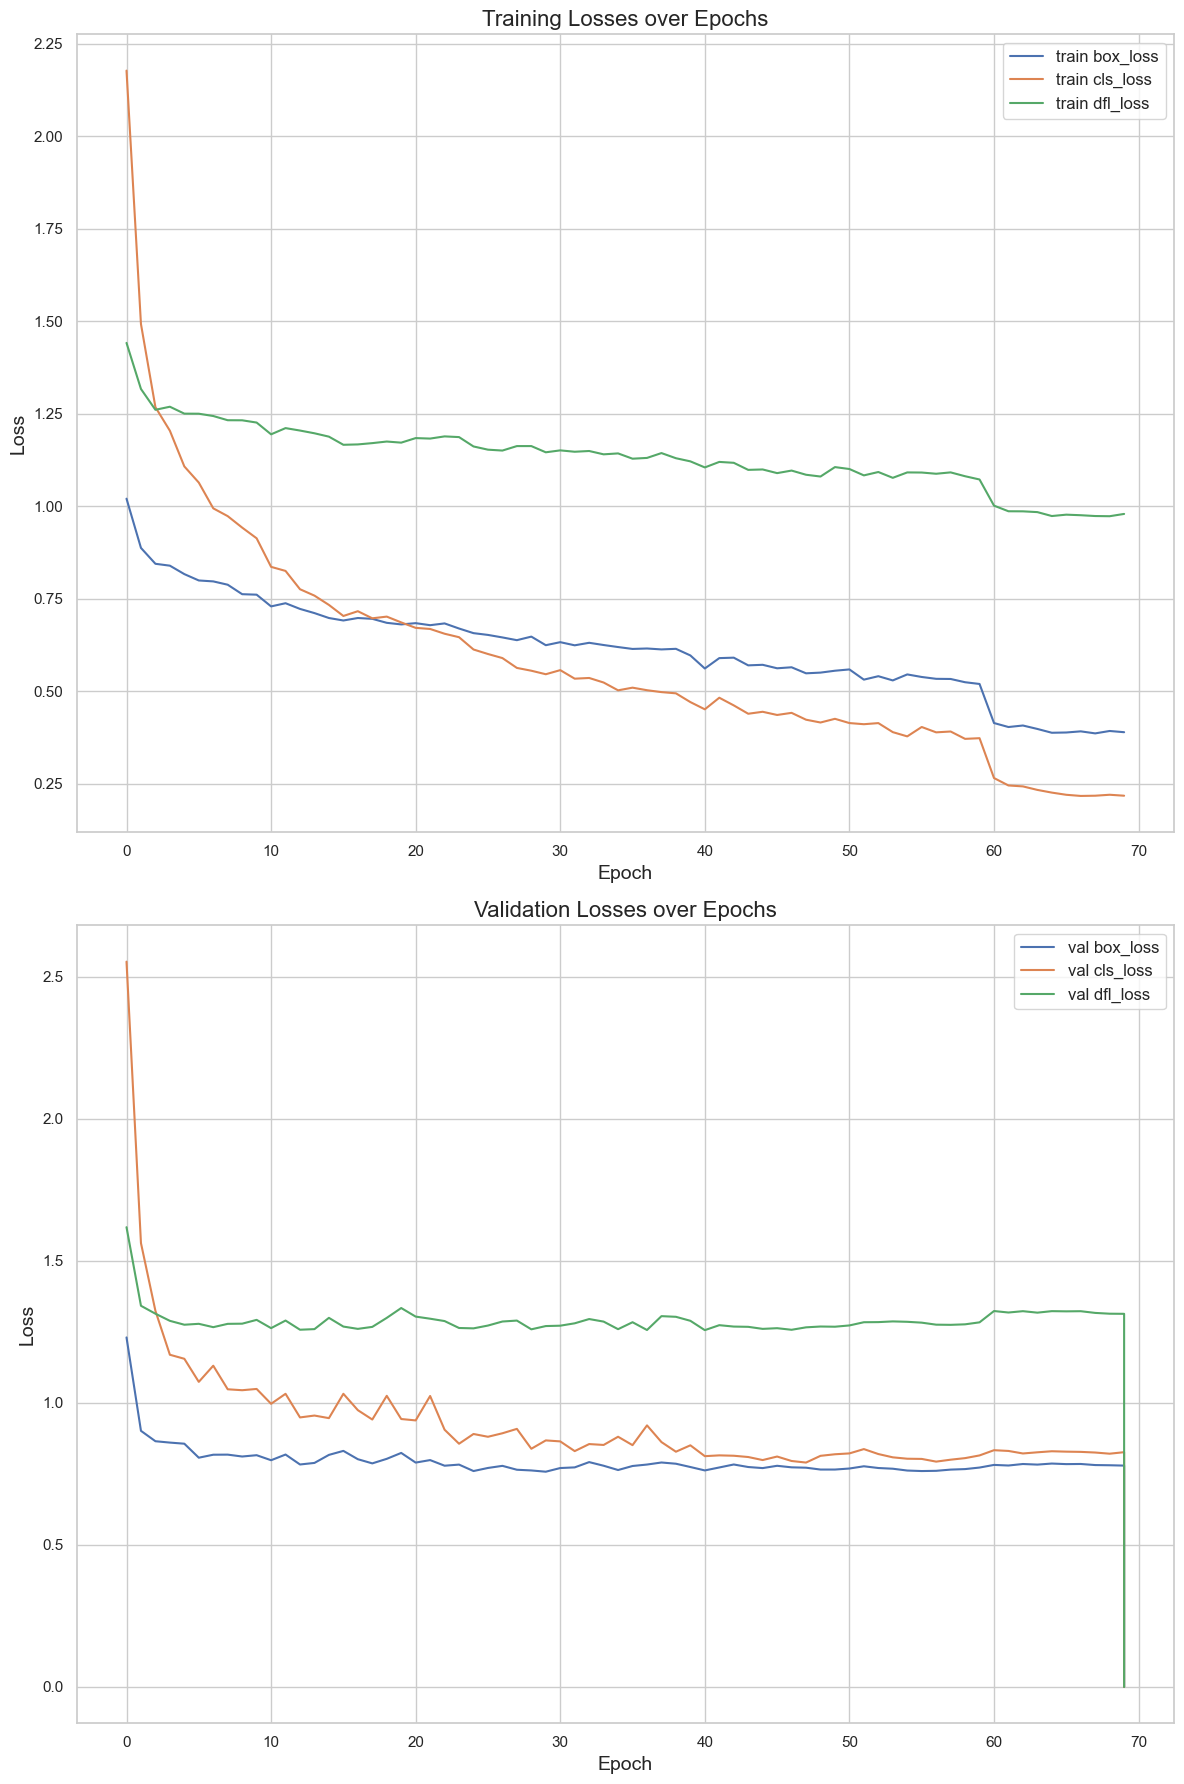

In [27]:
model_instance.plot_epochs_losses()

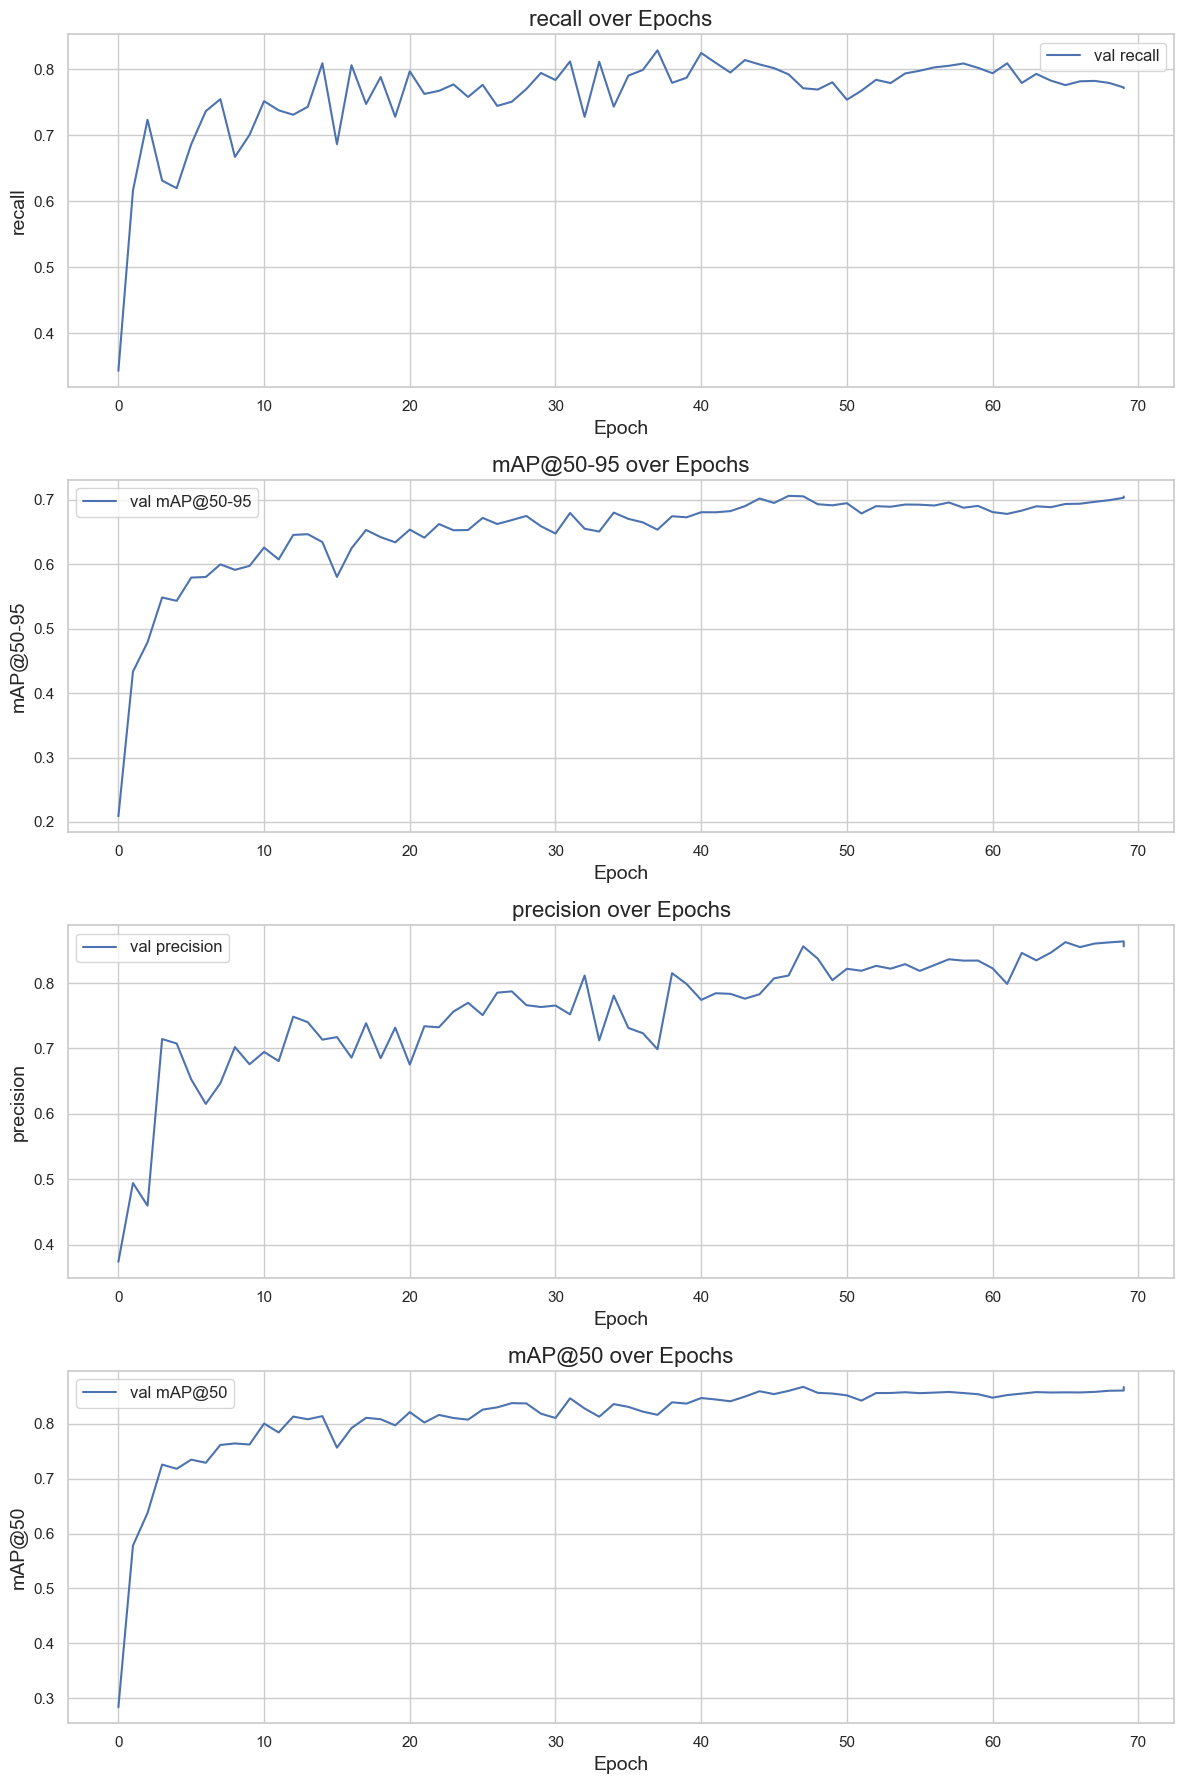

In [28]:
model_instance.plot_epochs_metrics()

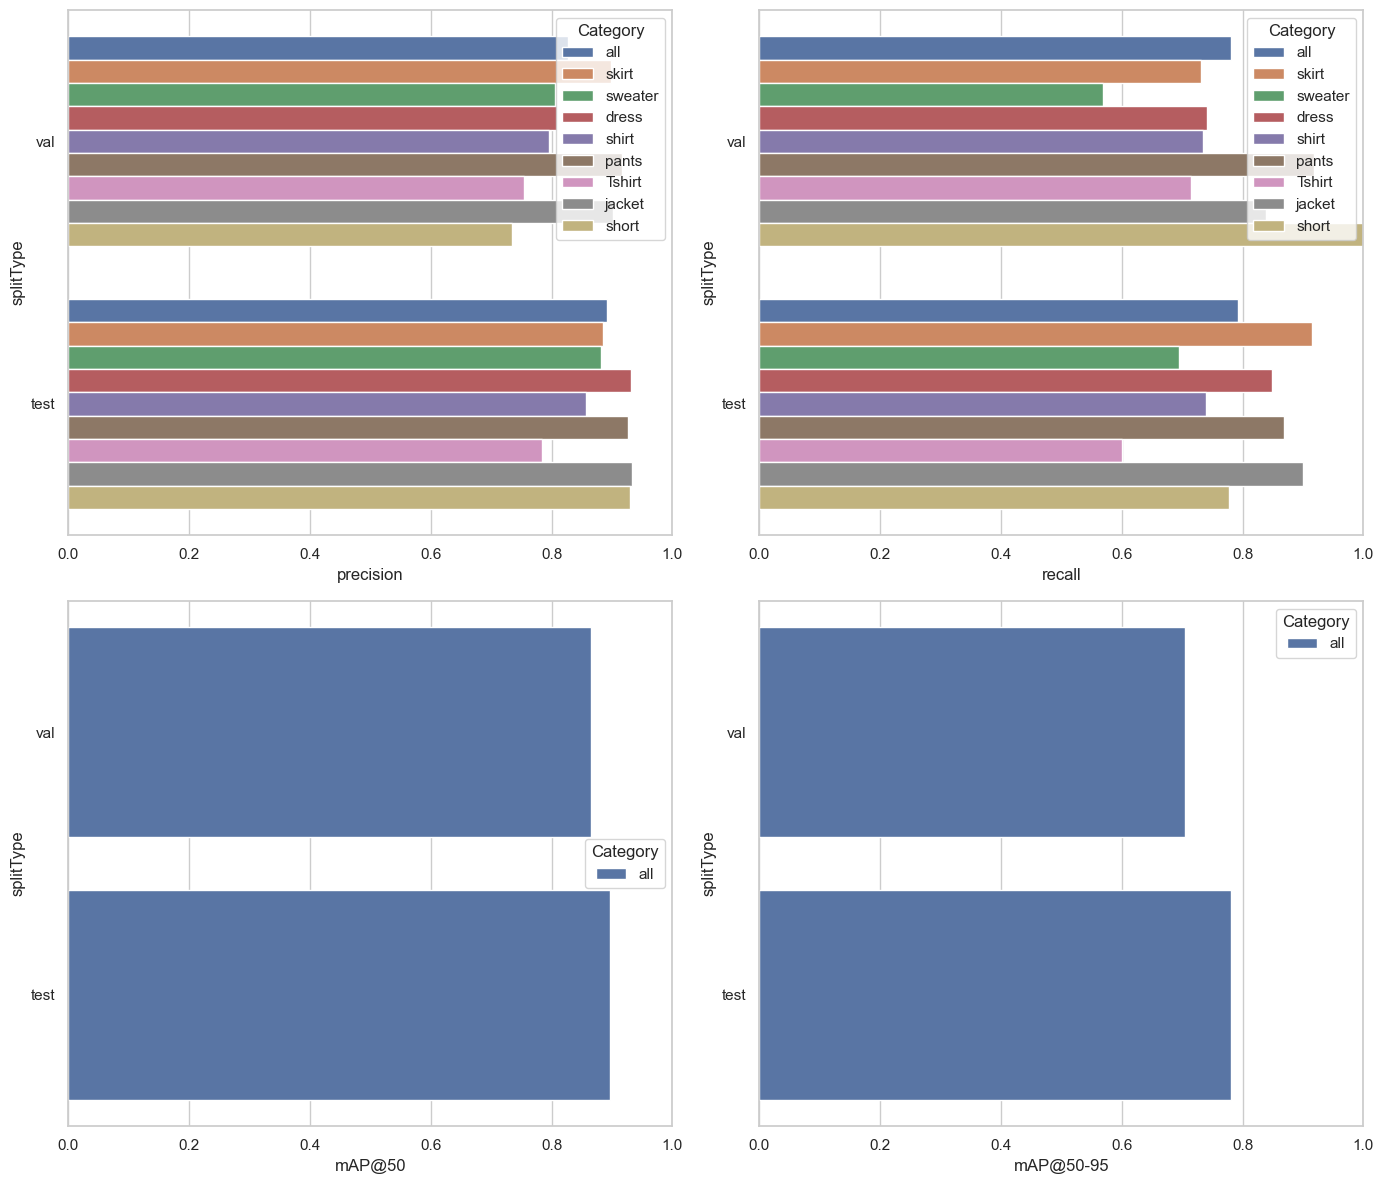

In [29]:
model_instance.plot_eval_results()